In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("drug200.csv")  # here we are reading the file 

In [3]:
data.info()    # shows all info (data types , amount if string) 
# object --> strings/lists/tuples
data.columns = data.columns.str.lower()  # make it more comfortable to worl

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
data.head(10)  # shows the names of columns 

,age,sex,bp,cholesterol,na_to_k,drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [5]:
data.tail()

,age,sex,bp,cholesterol,na_to_k,drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [6]:
data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          200 non-null    int64  
 1   sex          200 non-null    object 
 2   bp           200 non-null    object 
 3   cholesterol  200 non-null    object 
 4   na_to_k      200 non-null    float64
 5   drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
# если есть какие-то строки, нужно определить нету ли пропусков данных, в данном случае, их нет

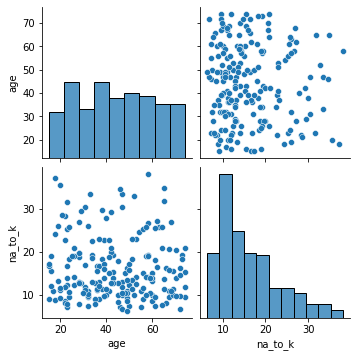

In [8]:
sns.pairplot(data)

<AxesSubplot:>

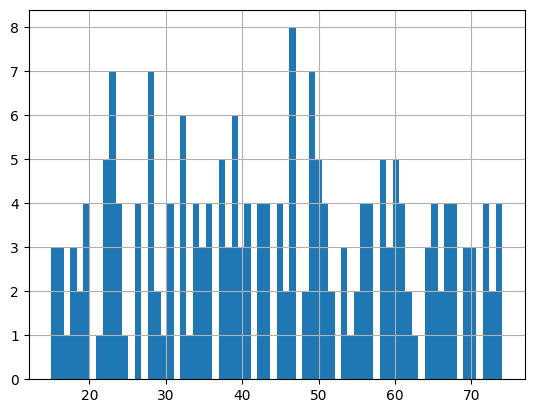

In [9]:
data.age.hist(bins=70)  # option to display data (very rude -- more beuatiful is to use sns.displot(data['age])

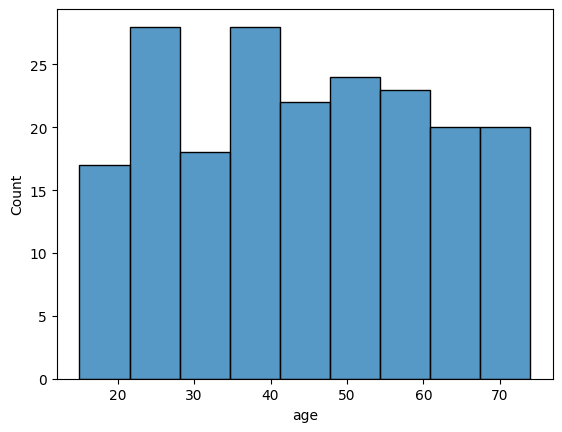

In [10]:
ax = sns.histplot(data['age']) 
# distribution is quite ok, so that we don't need to clean data ( maybe, because of lack of data) 

/home/hacking/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

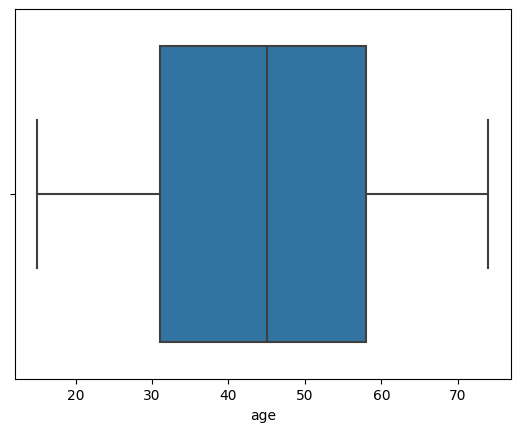

In [11]:
sns.boxplot(data['age']) # displaying boxplot

In [12]:
def class_bar(data, sign, x=8, y=5):
    """
    The function is used for drawing the categorial distribution  
    """
    df = data.copy()
    df_row = (df[sign].value_counts(normalize = True) * 100).reset_index()
 
 
    plt.gcf().set_size_inches(x, y)
    plt.rcParams.update({'font.size': 11})
    sns.barplot(x = 'index', y = sign, data = df_row, edgecolor='.1', saturation = 1)
    for index, row_text in df_row.iterrows():
            plt.text(index, row_text[sign] * 1.01, '{}%'.format(round(row_text[sign], 1)), color = 'black', ha = 'center')
 
 
    plt.ylim([0, 250])
    plt.grid(axis = 'y')
    plt.xlabel('Class')
    plt.ylabel('Part of class (%)')
    plt.title(f'Diagram of class balance: {sign}')
    plt.show()

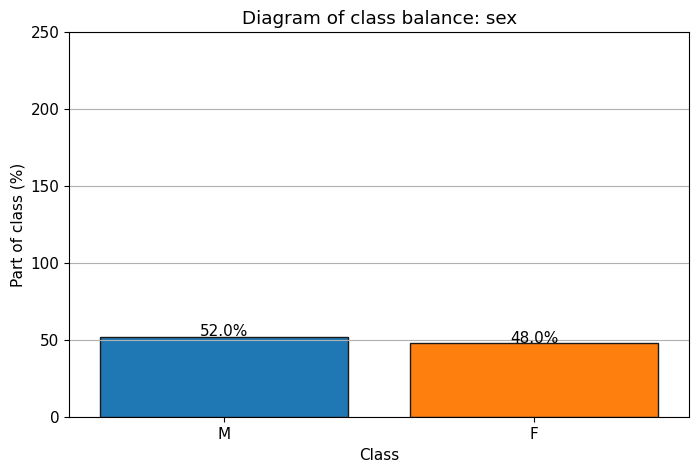

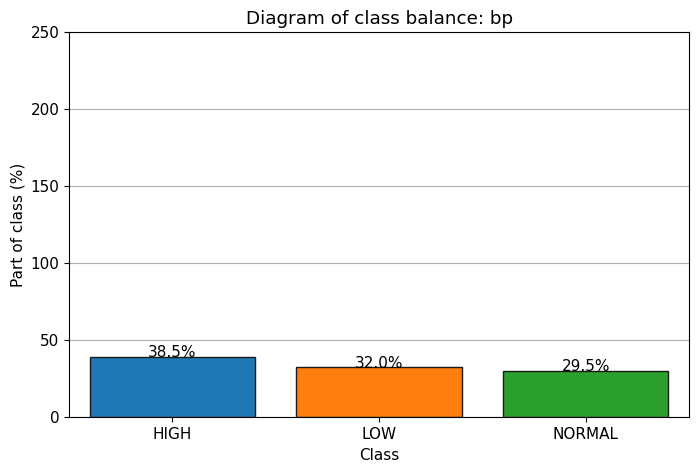

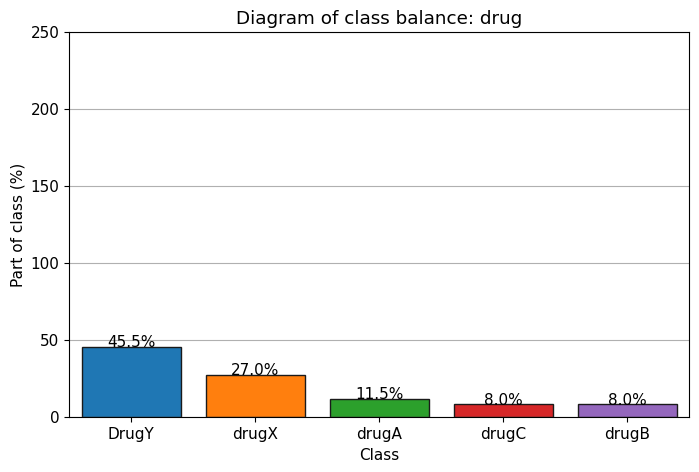

In [13]:
class_bar(data, 'sex')
class_bar(data, 'bp')
class_bar(data, 'drug')
# In this case we have similar percentage of params and we don't need to clear this data 

In [14]:
# we are making categorial feautres into numeral

sex_label_encoder = LabelEncoder()    #                           labelencoder_sex --> 
bp_label_encoder = LabelEncoder()    
drug_label_encoder = LabelEncoder()     
cholesterol_label_encoder = LabelEncoder()    

sex_label_encoder.fit(data['sex'])
bp_label_encoder.fit(data['bp'])
drug_label_encoder.fit(data['drug'])
cholesterol_label_encoder.fit(data['cholesterol'])

data['sex'] = sex_label_encoder.transform(data['sex']) # encoding man - 0 / woman - 1
data['bp'] = bp_label_encoder.transform(data['bp']) 
data['drug'] = drug_label_encoder.transform(data['drug']) 
data['cholesterol'] = cholesterol_label_encoder.transform(data['cholesterol']) 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          200 non-null    int64  
 1   sex          200 non-null    int64  
 2   bp           200 non-null    int64  
 3   cholesterol  200 non-null    int64  
 4   na_to_k      200 non-null    float64
 5   drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [15]:
sex_label_encoder.get_params()

{}

In [16]:
# data['sex'].value_counts() or data['sex'].unique() 
# data['sex'].value_counts()

In [17]:
# data['sex'].value_counts(normalize=True)  # in % 

In [18]:
model = DecisionTreeClassifier() # create the instance of class

<!-- # разделяем выборку на две части, для того, одна - обучается , другая - проверяем качество обучения для избежания 
переобучения (давая модели новые данные, которых не было при обучении) -->

### We divide the samples into two parts, the one - is training, the other - we check the quality of training to avoid retraining (giving the model new data that was not there during training for the model not to memorize data and make the predictions more precise)

In [19]:
features = data.drop(columns = ['drug']) # dropping the column because we don't need the target in features
target = data['drug']
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target,
                                                                            test_size=0.25, 
                                                                            random_state=666,
                                                                            stratify=target )

# stratify - this param is used for getting the same distribution for each data sampling ??  
# test_size -- checking wether fitiing was correct >> 

In [20]:
#print(target_test.value_counts(normalize=True))
#print(target_train.value_counts(normalize=True))
"""The distribution really becomes the same"""

'The distribution really becomes the same'

In [21]:
print(target_test.value_counts(normalize=True))
print(target_train.value_counts(normalize=True))

0    0.46
4    0.26
1    0.12
3    0.08
2    0.08
Name: drug, dtype: float64
0    0.453333
4    0.273333
1    0.113333
2    0.080000
3    0.080000
Name: drug, dtype: float64


In [22]:
model.fit(features_train, target_train)  # fitting

DecisionTreeClassifier()

In [23]:
predictions = model.predict(features_test) # we are giving testing features

In [24]:
accuracy_score(target_test, predictions) # checking the accuract score of prediction

1.0

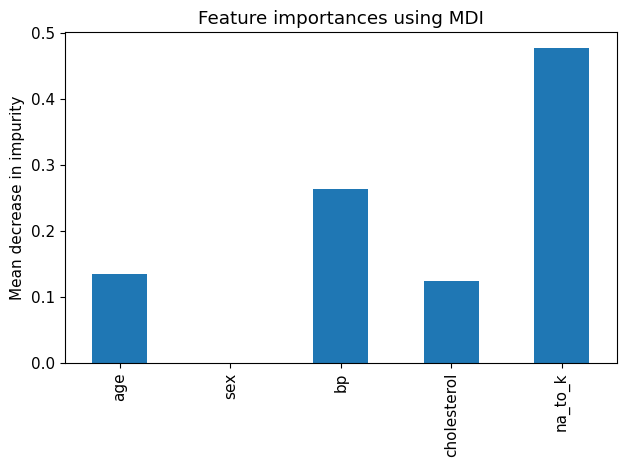

In [25]:
"""We are checking the needed(important) columns(features) in ready the model's education(fitting) """

importances = model.feature_importances_ # 
feature_names = features.columns
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [26]:
"""In conclusion we managed to train the model HURRAAYY! The first DS project!!"""

'In conclusion we managed to train the model HURRAAYY! The first DS project!!'

In [27]:
predictions = drug_label_encoder.inverse_transform(predictions)

In [28]:
features_test['drug_model_advice'] = predictions

In [29]:
# features_test.head()
features_test['bp'] = bp_label_encoder.inverse_transform(features_test['bp'])
features_test['sex'] = sex_label_encoder.inverse_transform(features_test['sex'])
features_test['cholesterol'] =  cholesterol_label_encoder.inverse_transform(features_test['cholesterol'])

In [36]:
features_test.reset_index(drop=True).sort_values('drug_model_advice')

,age,sex,bp,cholesterol,na_to_k,drug_model_advice
39,67,M,LOW,NORMAL,20.693,DrugY
32,22,M,HIGH,NORMAL,28.294,DrugY
37,34,M,HIGH,HIGH,18.703,DrugY
30,70,F,NORMAL,HIGH,20.489,DrugY
28,37,M,LOW,NORMAL,16.724,DrugY
41,31,M,HIGH,HIGH,30.366,DrugY
42,63,M,NORMAL,HIGH,25.917,DrugY
48,56,M,LOW,HIGH,15.015,DrugY
23,58,M,HIGH,HIGH,18.991,DrugY
21,19,F,HIGH,NORMAL,25.969,DrugY
